1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [3]:
import numpy as np
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

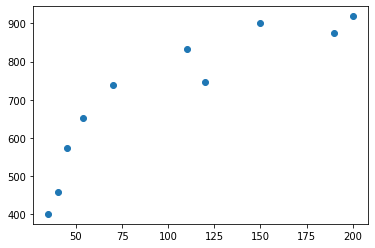

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [4]:
#расчет с использованием интерсепта
b = (np.mean(X*y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - (np.mean(X))**2)
b

2.620538882402765

In [5]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [6]:
y_hat = a + b*X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

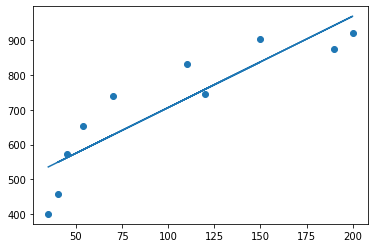

In [8]:
%matplotlib inline
plt.scatter(X,y)
plt.plot(X,a + b*X)
plt.show()

In [9]:
#найдем среднюю квадратичную ошибку
mse = ((y - y_hat)**2).sum() / 10
mse

6470.414201176658

In [13]:
#найдем коэффициент линейной регрессии без интерсепта с использованием матричного метода
X = X.reshape(10,1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [15]:
y = y.reshape(10,1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [16]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y) 
B

array([[5.88982042]])

In [20]:
B[0][0]

5.889820420132688

In [22]:
y_hat = B[0][0] * X
y_hat

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

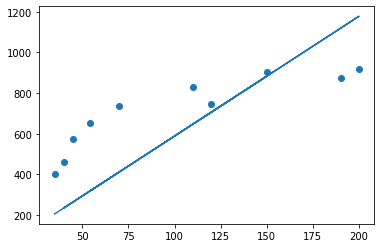

In [23]:
%matplotlib inline
plt.scatter(X,y)
plt.plot(X,B[0][0]*X)
plt.show()

In [24]:
#найдем среднюю квадратичную ошибку
mse = ((y - y_hat)**2).sum() / 10
mse

56516.8584157194

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [25]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [26]:
def mse(B1, X=X, y=y, n=10):
    return np.sum((B1*X - y)**2) / n

In [27]:
alpha = 0.000001
alpha

1e-06

In [29]:
B1 = 3
n = 10
for i in range(10):
    B1 -= alpha * (2/n) * np.sum((B1*X-y)*X)
    print('B1 = {}'.format(B1))

B1 = 3.0796238
B1 = 3.15705370951384
B1 = 3.232350177244863
B1 = 3.3055719863412
B1 = 3.3767763002871436
B1 = 3.446018707530072
B1 = 3.5133532648777543
B1 = 3.5788325396999245
B1 = 3.6425076509670644
B1 = 3.704428309158439


In [31]:
for i in range(100):
    B1 -= alpha * (2/n) * np.sum((B1*X-y)*X)
    if i%10 ==0:
        print('Iteration: {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse(B1)))

Iteration: 0, B1 = 3.7646428550705346, mse = 118737.21475713658
Iteration: 10, B1 = 4.282680318017608, mse = 92100.42901992159
Iteration: 20, B1 = 4.6744399501478515, mse = 76866.95879117158
Iteration: 30, B1 = 4.970703483857776, mse = 68154.99866581765
Iteration: 40, B1 = 5.1947492359150225, mse = 63172.66384085349
Iteration: 50, B1 = 5.36418115480939, mse = 60323.28666845249
Iteration: 60, B1 = 5.492312015924274, mse = 58693.73936666948
Iteration: 70, B1 = 5.589209446332751, mse = 57761.80784336377
Iteration: 80, B1 = 5.662486968532084, mse = 57228.839967450825
Iteration: 90, B1 = 5.71790221780173, mse = 56924.037790840746


In [32]:
for i in range(5000):
    B1 -= alpha * (2/n) * np.sum((B1*X-y)*X)
    if i%500 ==0:
        print('Iteration: {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse(B1)))

Iteration: 0, B1 = 5.759809336921608, mse = 56749.7226565428
Iteration: 500, B1 = 5.889820308727315, mse = 56516.85841571957
Iteration: 1000, B1 = 5.889820420132593, mse = 56516.8584157194
Iteration: 1500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 2000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 2500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 3000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 3500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 4000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 4500, B1 = 5.889820420132673, mse = 56516.85841571943


In [33]:
mse(5.8898204)

56516.85841571941

*3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [4]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [19]:
def mse(B0, B1, X=X, y=y, n=10):
    return np.sum((B0+B1*X - y)**2) / n

In [20]:
alpha0 = 0.0001
alpha1 = 0.000001

In [10]:
# производная по B0:
#(2/n) * np.sum(B0+B1*X-y)
# производная по B1:
#(2/n) * np.sum((B0+B1*X-y)*X)

In [29]:
B0 = 2
B1 = 2
n = 10
for i in range(10):
    B0 -= alpha0 * (2/n) * np.sum(B0+B1*X-y)
    B1 -= alpha1 * (2/n) * np.sum((B0+B1*X-y)*X)
    print('B0 = {}, B1 = {}'.format(B0, B1))

B0 = 2.10102, B1 = 2.106750913144
B0 = 2.1998548874814396, B1 = 2.2105404533127793
B0 = 2.29656515611076, B1 = 2.3114506466809024
B0 = 2.391209623964849, B1 = 2.409561247411034
B0 = 2.4838454799425604, B1 = 2.504949800585536
B0 = 2.5745283288906973, B1 = 2.5976917033949434
B0 = 2.6633122354800696, B1 = 2.6878602646316065
B0 = 2.7502497668662444, B1 = 2.7755267625354385
B0 = 2.8353920341686525, B1 = 2.8607605010374177
B0 = 2.9187887328007798, B1 = 2.9436288644452215


In [35]:
for i in range(300000):
    B0 -= alpha0 * (2/n) * np.sum(B0+B1*X-y)
    B1 -= alpha1 * (2/n) * np.sum((B0+B1*X-y)*X)
    if i%10000 ==0:
        print('Iteration: {i}, B0 = {B0}, B1 = {B1}, mse ={mse} '.format(i=i, B0=B0, B1=B1, mse=mse(B0,B1)))

Iteration: 0, B0 = 444.1764785279224, B1 = 2.620545362155919, mse =6470.4142013725605 
Iteration: 10000, B0 = 444.1768267955459, B1 = 2.6205427942253534, mse =6470.414201248056 
Iteration: 20000, B0 = 444.1770370444767, B1 = 2.620541243967393, mse =6470.414201202682 
Iteration: 30000, B0 = 444.1771639716119, B1 = 2.620540308077726, mse =6470.414201186141 
Iteration: 40000, B0 = 444.1772405974375, B1 = 2.6205397430817676, mse =6470.414201180115 
Iteration: 50000, B0 = 444.17728685639696, B1 = 2.6205394019940855, mse =6470.414201177914 
Iteration: 60000, B0 = 444.1773147828976, B1 = 2.6205391960797004, mse =6470.414201177116 
Iteration: 70000, B0 = 444.1773316421089, B1 = 2.6205390717693104, mse =6470.414201176825 
Iteration: 80000, B0 = 444.1773418200032, B1 = 2.620538996723213, mse =6470.414201176722 
Iteration: 90000, B0 = 444.1773479643897, B1 = 2.620538951417945, mse =6470.414201176682 
Iteration: 100000, B0 = 444.1773516737524, B1 = 2.620538924067181, mse =6470.414201176663 
Iterat

In [36]:
mse(444.1773573238, 2.6205388824)

6470.414201176654